# Linear Regression 

## import library

In [184]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

## load point data for training and testing

In [2]:
fname_data  = 'assignment_07_data.csv'

data        = np.genfromtxt(fname_data, delimiter=',')
num_data    = data.shape[0]

xx          = np.zeros(num_data)
yy          = np.zeros(num_data)
zz          = np.zeros(num_data)

for i in range(num_data):

    xx[i] = data[i,0]
    yy[i] = data[i,1]
    zz[i] = data[i,2]

## plot the data in the three dimensional space

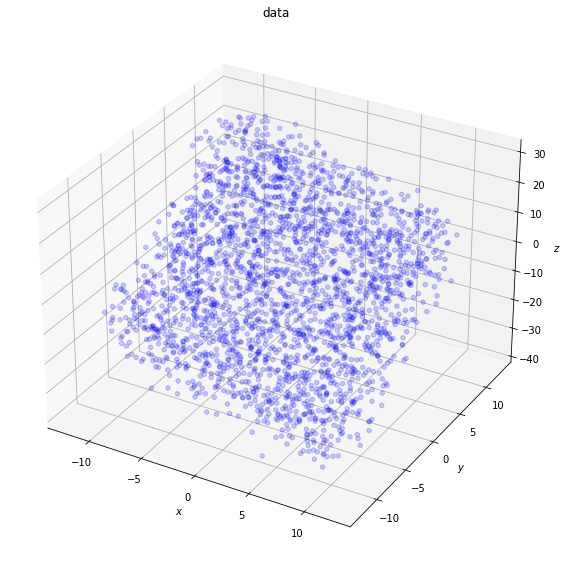

In [3]:
fig = plt.figure(figsize=(12, 8))

ax1 = plt.subplot(111, projection='3d')
plt.title('data')

ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.set_zlabel('$z$')

ax1.scatter(xx, yy, zz, marker='o', color='blue', alpha=0.2)

plt.tight_layout()
plt.show()

## compute the loss function

In [21]:
def compute_residual(theta, x, y, z):
    # ===== FILL UP THE CODE =====
    f_hat = theta[0] + theta[1]*x + theta[2]*y
    residual = z - f_hat
    num_data = y.shape[0]
    # ============================
    return residual, num_data

In [22]:
def compute_loss(theta, x, y, z):
    # ===== FILL UP THE CODE =====
    f_hat = theta[0] + theta[1]*x + theta[2]*y
    loss = (1/ (2*y.shape[0])) * np.sum((f_hat - z)**2)
    # ============================
    return loss

## compute the gradient for each model parameter (DO NOT COMPUTE THE GRADIENT FOR EACH MODEL PARAMETER, BUT DO COMPUTE THE GRADIENT OF THE MODEL PARAMTER VECTOR)

In [133]:
def compute_gradient(theta, x, y, z):
    # ===== FILL UP THE CODE =====
    theta = theta.reshape(-1, 1)
    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)
    z = z.reshape(-1, 1)
    one = np.ones((x.shape))
    
    X = np.concatenate((one, x), axis = 1)
    X = np.concatenate((X, y), axis = 1)
    
    grad = (2/x.shape[0]) * X.T.dot(X.dot(theta) - z)
    grad = np.squeeze(grad)
    # ============================
    return grad

## gradient descent for each model parameter

In [144]:
num_iteration   = 1000
learning_rate   = 0.01

theta           = np.array((0., 0., 0.))
theta_iteration = np.zeros((num_iteration, theta.size))
loss_iteration  = np.zeros(num_iteration)

for i in range(num_iteration):
    # ===== FILL UP THE CODE =====
    loss = compute_loss(theta, xx, yy, zz)
    theta -= learning_rate * compute_gradient(theta, xx, yy, zz)
    loss_iteration[i] = loss
    theta_iteration[i] = theta
    # ============================
    print("iteration = %4d, loss = %5.5f" % (i, loss))

iteration =    0, loss = 95.36768
iteration =    1, loss = 18.23692
iteration =    2, loss = 11.83941
iteration =    3, loss = 11.17061
iteration =    4, loss = 10.97127
iteration =    5, loss = 10.81566
iteration =    6, loss = 10.66911
iteration =    7, loss = 10.52860
iteration =    8, loss = 10.39368
iteration =    9, loss = 10.26410
iteration =   10, loss = 10.13965
iteration =   11, loss = 10.02013
iteration =   12, loss = 9.90534
iteration =   13, loss = 9.79510
iteration =   14, loss = 9.68922
iteration =   15, loss = 9.58754
iteration =   16, loss = 9.48988
iteration =   17, loss = 9.39609
iteration =   18, loss = 9.30601
iteration =   19, loss = 9.21951
iteration =   20, loss = 9.13642
iteration =   21, loss = 9.05663
iteration =   22, loss = 8.98000
iteration =   23, loss = 8.90640
iteration =   24, loss = 8.83571
iteration =   25, loss = 8.76783
iteration =   26, loss = 8.70263
iteration =   27, loss = 8.64002
iteration =   28, loss = 8.57988
iteration =   29, loss = 8.5221

iteration =  626, loss = 7.12144
iteration =  627, loss = 7.12144
iteration =  628, loss = 7.12144
iteration =  629, loss = 7.12144
iteration =  630, loss = 7.12144
iteration =  631, loss = 7.12144
iteration =  632, loss = 7.12144
iteration =  633, loss = 7.12144
iteration =  634, loss = 7.12144
iteration =  635, loss = 7.12144
iteration =  636, loss = 7.12144
iteration =  637, loss = 7.12144
iteration =  638, loss = 7.12144
iteration =  639, loss = 7.12144
iteration =  640, loss = 7.12144
iteration =  641, loss = 7.12144
iteration =  642, loss = 7.12144
iteration =  643, loss = 7.12144
iteration =  644, loss = 7.12144
iteration =  645, loss = 7.12144
iteration =  646, loss = 7.12144
iteration =  647, loss = 7.12144
iteration =  648, loss = 7.12144
iteration =  649, loss = 7.12144
iteration =  650, loss = 7.12144
iteration =  651, loss = 7.12144
iteration =  652, loss = 7.12144
iteration =  653, loss = 7.12144
iteration =  654, loss = 7.12144
iteration =  655, loss = 7.12144
iteration 

In [135]:
f = theta[0] + theta[1] * xx + theta[2] * yy

## plot the results

In [145]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))
    plt.title('loss')
    # ===== FILL UP THE CODE =====
    plt.plot(list(range(num_iteration)), loss_iteration, '-', color = 'red')

    # ============================
    plt.tight_layout()
    plt.show()

In [147]:
def plot_data(xx, yy, zz):
    
    fig = plt.figure(figsize=(12, 8))
    ax  = plt.subplot(111, projection='3d')
    plt.title('data')
    # ===== FILL UP THE CODE =====

    ax.scatter(xx, yy, zz, marker='o', color='blue', alpha=0.2)
    # ============================    
    plt.tight_layout()
    plt.show()

In [150]:

def plot_model_parameter(theta_iteration):

    plt.figure(figsize=(8,6))
    plt.title('model parameter')
    # ===== FILL UP THE CODE =====
    plt.plot(list(range(num_iteration)), theta_iteration[:, 0], '-', color = 'red')
    plt.plot(list(range(num_iteration)), theta_iteration[:, 1], '-', color = 'green')
    plt.plot(list(range(num_iteration)), theta_iteration[:, 2], '-', color = 'blue')
    # ============================
    plt.tight_layout()
    plt.show()

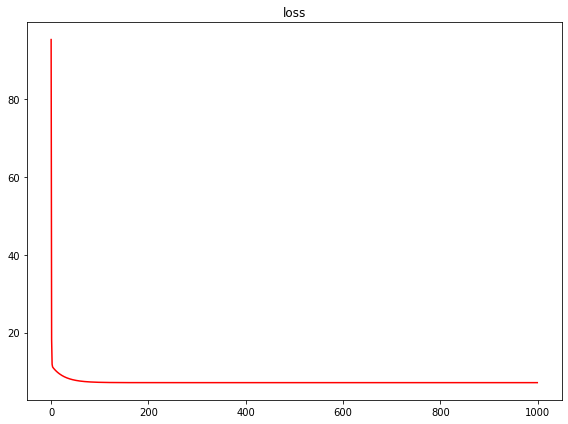

In [152]:
plot_loss_curve(loss_iteration)

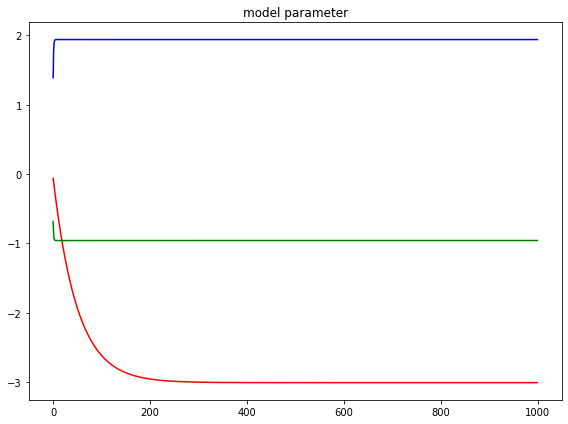

In [153]:
plot_model_parameter(theta_iteration)

In [260]:
# ===== FILL UP THE CODE =====
XX, YY = np.meshgrid(xx, yy)
ZZ = f.reshape(-1, 1).dot(f.reshape(1, -1))

def plot_surface(XX, YY, ZZ, xx, yy, zz):
    fig = plt.figure(figsize=(8,8))
    ax  = fig.add_subplot(111, projection='3d')
    plt.title('loss surface')
    ax  = plt.axes(projection='3d')
    # ===== FILL UP THE CODE =====
    ax.scatter(xx, yy, zz, marker='o', color='blue', alpha=1)
    ax.plot_surface(XX, YY, ZZ, cmap = cm.hot, alpha = 0.2)
    # ============================
    plt.tight_layout()
    plt.show()

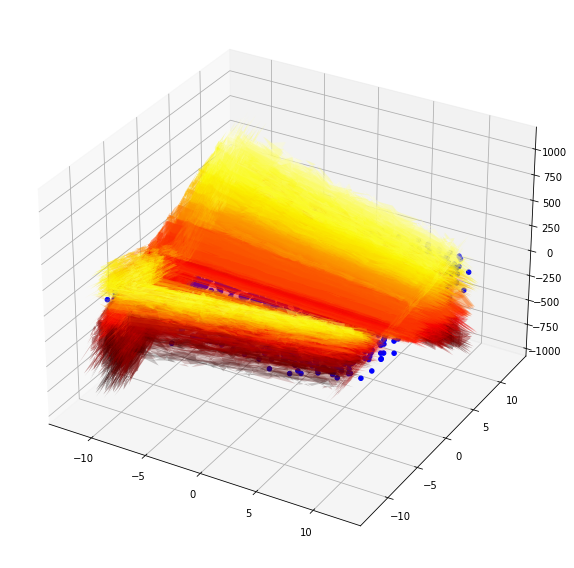

In [261]:
plot_surface(XX, YY, ZZ, xx, yy, zz)

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

# * results

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

### # 01. plot the input data in blue point in 3-dimensional space

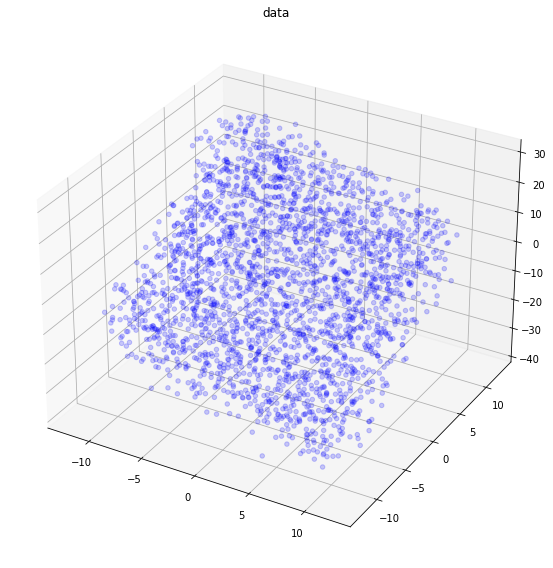

In [148]:
plot_data(xx, yy, zz)

### # 02. plot the values of the model parameters $\theta_0$ in red curve, $\theta_1$ in green curve, and $\theta_2$ in blue curve over the gradient descent iterations

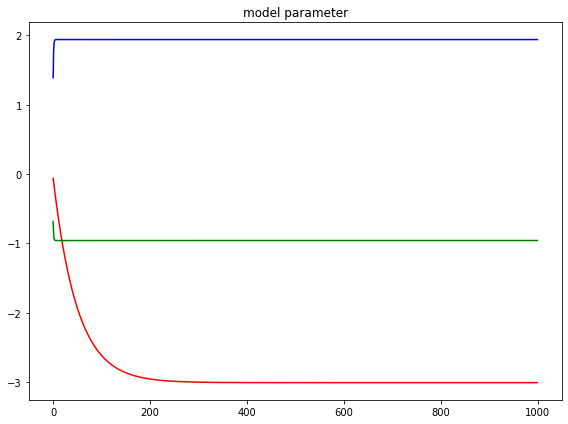

In [151]:
plot_model_parameter(theta_iteration)

### # 03. plot the loss values $\mathcal{L}(\theta)$ in red curve over the gradient descent iterations

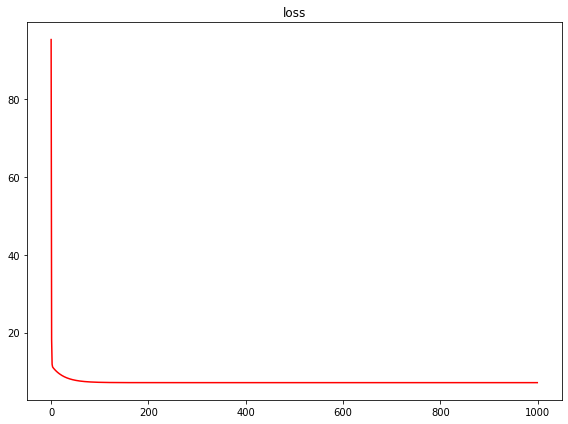

In [146]:
plot_loss_curve(loss_iteration)

### # 04. plot the optimal regression surface $\hat{f}(\theta^*)$ in 3-dimensional space with a given set of data points superimposed

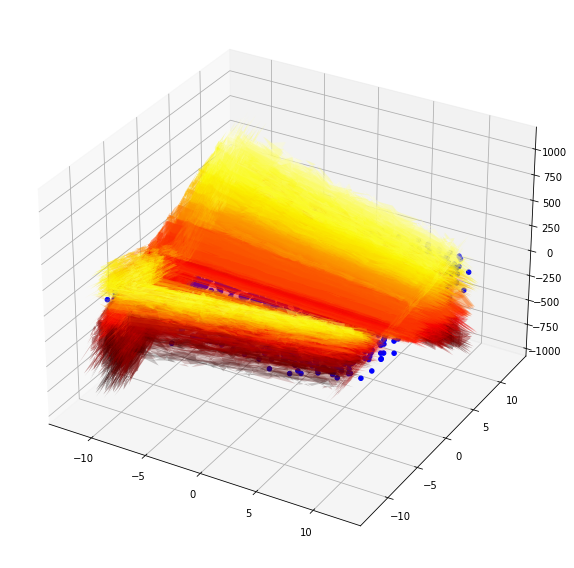

In [262]:
plot_surface(XX, YY, ZZ, xx, yy, zz)